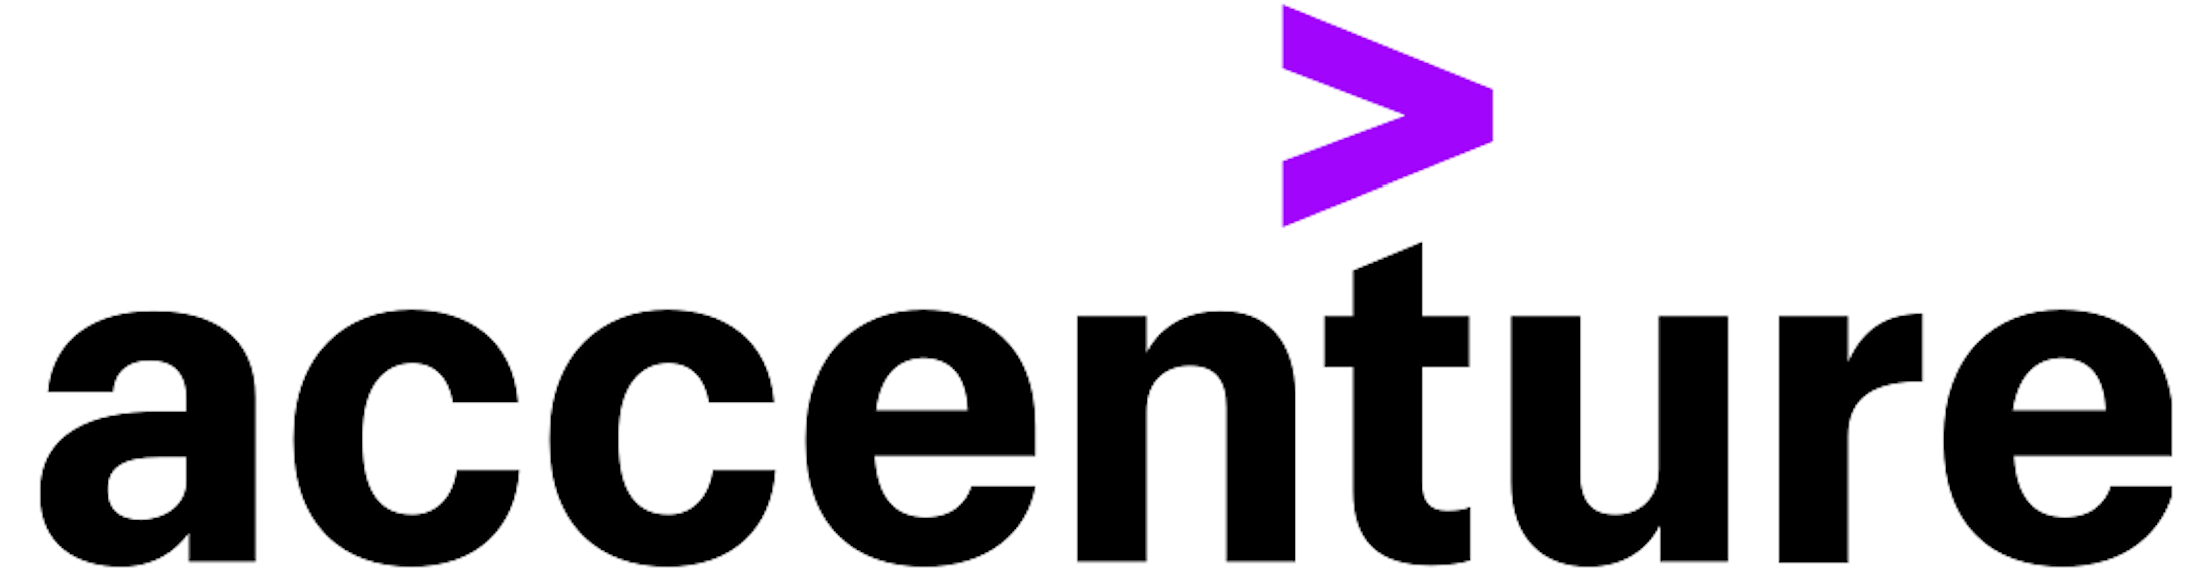

### Data Cleaning and Modeling 
***
#### Daniel Harrington \ Virtual Internship \ February 2022  

In [1]:
import pandas as pd
import numpy as np

### Objective: 
***

After reviewing the client briefing, it is clear that Social Buzz would like "An analysis of their content categories that highlights the top 5 categories with the largest aggregate popularity."

To achieve this, we will need to work with the Content, Reaction, and ReactionTypes files. Additional client requests, such as IPO advisement, appear to be outside the scope of the datasets provided. 


In [2]:
# First, we need to import each csv file as a dataframe: 

content = pd.read_csv('Content.csv')
reaction = pd.read_csv('Reactions.csv') 

### Cleaning the Data:
***
The Content.csv file contains several columns that are not within
the scope of this particular client request. 
I chose to drop User ID, Type, and URL from this dataframe. 

In this case, it is important to drop these columns before concatenating the dataframes because there are a couple of 
identically named columns in different .csv files.

In [3]:
content = content.drop(columns = ['User ID'])
content = content.drop(columns = ['Type'])
content = content.drop(columns = ['URL'])
content = content.drop(columns = ['Unnamed: 0'])

In [4]:
# Similarly, Reaction.csv contains superfluous columns: 

reaction = reaction.drop(columns = ['User ID'])
reaction = reaction.drop(columns = ['Datetime'])
reaction = reaction.drop(columns = ['Unnamed: 0'])

#### Creating a Dictionary of Reaction Type Values
***
In this section, I created a dictionary of numerical Reaction Type values using the "Scores" column in the ReactionTypes.csv dataset. This will allow us to begin the process of ranking each piece of content on the client's platform. 

In [5]:
type_score = {'heart': 60, 'want': 70, 'disgust': 0, 'hate': 5, 'interested': 30, 'indifferent': 20, 'love': 65, 'super love': 75, 'cherish': 70, 'adore': 72, 'like': 50, 'dislike': 10, 'intrigued': 45, 'peeking': 35, 'scared': 15, 'worried': 12}

#### Removing Null Values and Replacing Values
***
Next, I used dropna() to remove null rows from the Reactions dataset. With the nulls removed, we are able to replace each reaction type with a numerical score: 

In [6]:
reaction = reaction.dropna()

In [7]:
reaction = reaction.replace(type_score)

#### Grouping and Sorting
***
Now that each reaction type has been replaced with its corresponding score value, we can tally and then sort the scores by Content ID to see which content was most popular on our client's platform. 

The ten most popular pieces of content are then stored in a variable. 

In [8]:
reaction_score = reaction.groupby(['Content ID']).sum()

In [9]:
reaction_score = reaction_score.sort_values(by='Type', ascending=False)

In [31]:
top_ten = reaction_score[:10]

In [32]:
display(top_ten)

,Type
Content ID,
292051b5-b835-4a60-962a-bddf10da82bd,2273
697af362-e84b-4429-b4ea-4123c6ab44ba,2231
4dd4da35-453e-466d-95ca-b1a7710fac1f,2223
cd568dd1-70cf-45d6-b495-10eebff8c920,2222
31d142d9-4557-4613-bce5-cfe63cd0a3cf,2164
bac28166-5b8d-4f5d-88da-8c8f9a1c3f5b,2138
02ba5af1-784a-44cc-ae3a-14833c4a2237,2129
4bfc9824-aaeb-4695-8195-945686795b30,2122
7f5299bf-ae57-4c01-a84c-f0c6bc7a5b5f,2105


#### Cleansing the Content Dataset
***
Our Content file has some data entry inconsistencies. To address this, I applied lambda mapping to the content dataframe in order to make our categories consistent. Without this seemingly minor step, we'll end up with "extra" categories that are caused by an uppercase letter or the presence of a punctuation mark.

In [23]:
content = content.applymap(lambda x: x.replace('"', ''))

In [26]:
content = content.applymap(lambda x: x.lower())

#### Sorting by Category
***
The client may be interested to know which categories have the greatest amount of content. While this content may not have the highest number of 'likes' per se, it may be a valuable insight for Social Buzz. 

In [29]:
grouped = content.groupby(['Category'], sort=True)
grouped = grouped.agg(np.size)

In [30]:
print(grouped)

                 Content ID
Category                   
animals                  72
cooking                  61
culture                  67
dogs                     58
education                59
fitness                  66
food                     64
healthy eating           62
public speaking          50
science                  68
soccer                   64
studying                 58
technology               73
tennis                   59
travel                   69
veganism                 50


***
We can see that Animals and Technology are frequently tagged on Social Buzz, followed by Travel, Science, and Culture. 

Veganism and Public Speaking appear to be the least-tagged content categories. 

#### Joining the Dataframes
***
Finally, in this step, I joined Social Buzz's 'Top Ten' pieces of content with their respective content categories.  


In [35]:
popular_content = pd.merge(top_ten, content, on=['Content ID'])

In [36]:
display(popular_content)

,Content ID,Type,Category
0,292051b5-b835-4a60-962a-bddf10da82bd,2273,technology
1,697af362-e84b-4429-b4ea-4123c6ab44ba,2231,science
2,4dd4da35-453e-466d-95ca-b1a7710fac1f,2223,technology
3,cd568dd1-70cf-45d6-b495-10eebff8c920,2222,dogs
4,31d142d9-4557-4613-bce5-cfe63cd0a3cf,2164,soccer
5,bac28166-5b8d-4f5d-88da-8c8f9a1c3f5b,2138,food
6,02ba5af1-784a-44cc-ae3a-14833c4a2237,2129,healthy eating
7,4bfc9824-aaeb-4695-8195-945686795b30,2122,public speaking
8,7f5299bf-ae57-4c01-a84c-f0c6bc7a5b5f,2105,animals
9,f08bdab2-b888-484e-8fd9-919e6ed86c12,2094,education


***
### Exporting the Results
We can see that content tagged Technology, Science, Dogs, Soccer and Food were all high-engagement categories on Social Buzz. 

The results can now be exported to a .csv file.
***

In [40]:
popular_content.to_csv('SocialBuzzTopTen.csv')